# **MINOR PROJECT**

# **TASK 1** - Exploratory Data Analysis

Q1 Are there any missing values in the wine dataset? How should these missing values be handled?

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
dataset = pd.read_csv(url, sep=";")


X = dataset.iloc[: , 1:-1].values
y = dataset.iloc[: , -1].values
missing_values = dataset.isnull().sum()
print(missing_values)


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


Q2 Are there any duplicate entries in the dataset that need to be identified and removed?

In [ ]:
duplicates = dataset.duplicated()
dataset = dataset.drop_duplicates()

print("Number of duplicate entries:", duplicates.sum())

Number of duplicate entries: 240


Observations: After removing duplicate entries, we find that there were 240 duplicate rows in the dataset. These duplicates have been successfully removed, and we are left with a dataset containing unique records only.

Q3 Can we create visualizations to understand the relationship between different physicochemical properties (e.g., acidity, alcohol content) and the sensory rating of the wine?

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

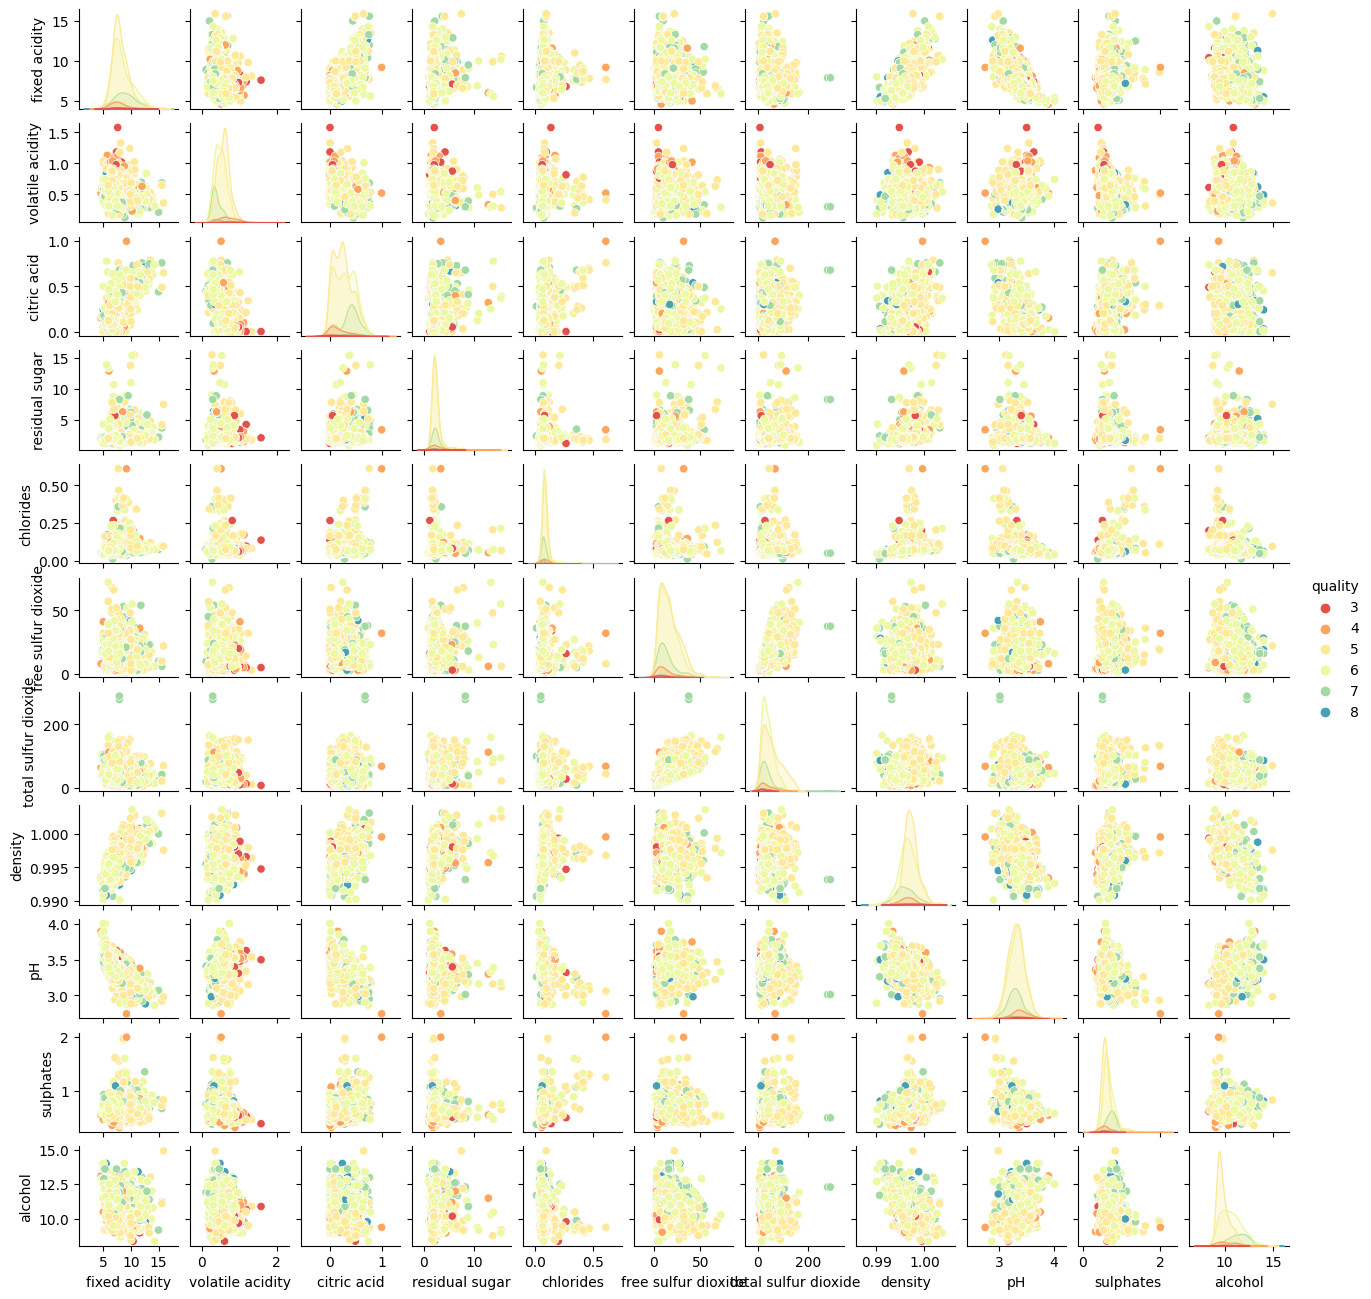

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
palette = sns.color_palette("Spectral")
sns.pairplot(dataset , hue='quality', palette=palette, height=1.2, diag_kind = 'kde')
plt.show()

Observations: The scatter plot shows a general positive relationship between alcohol content and the quality rating of the wine. Higher alcohol content tends to be associated with higher quality ratings.

Q4 How can we visualize the correlation between different features (e.g., pH level, volatile acidity) and the quality rating of the wine?


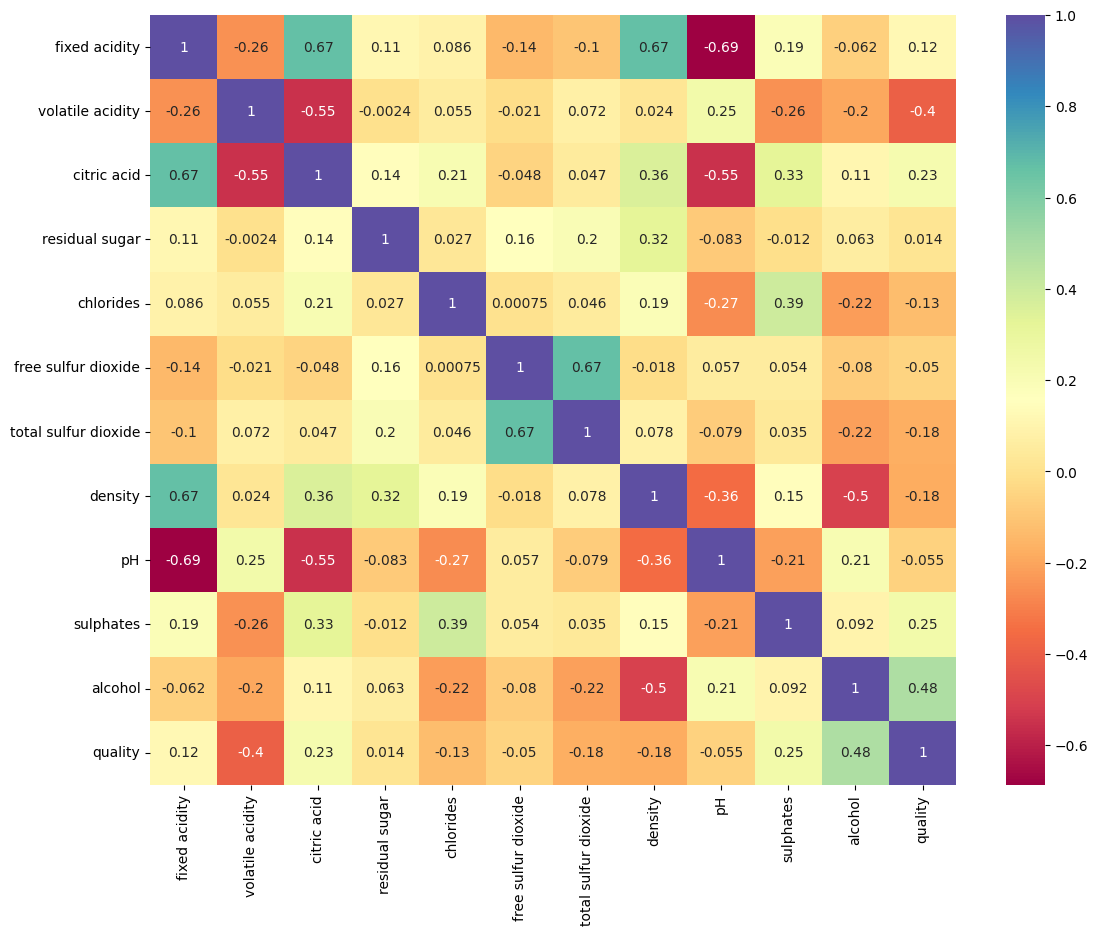

In [ ]:
plt.figure(figsize=(13, 10))
sns.heatmap(dataset.corr(), annot=True, cmap=plt.cm.Spectral)
plt.show()

Observations: The correlation matrix heatmap provides insights into the relationship between different features and the quality rating. Darker colors indicate stronger correlations. For example, alcohol content shows a positive correlation with the quality rating, while volatile acidity shows a negative correlation.

Q5 Can we visualize the distribution of different quality ratings and their respective physicochemical property trends?

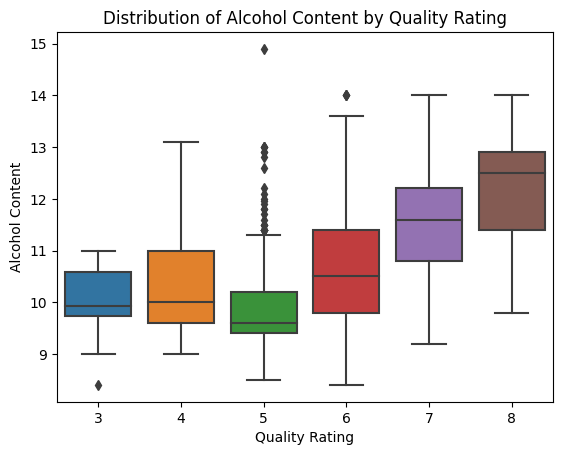

In [ ]:
sns.boxplot(x='quality', y='alcohol', data=dataset)
plt.xlabel('Quality Rating')
plt.ylabel('Alcohol Content')
plt.title('Distribution of Alcohol Content by Quality Rating')
plt.show()


To visualize the distribution of different quality ratings and their corresponding physicochemical property trends, box plots were used. These plots depicted the variation in specific properties, such as alcohol content, for each quality rating category. By examining the box plots, we gained insights into the differences and trends in physicochemical properties across different quality ratings.

# **TASK 2** - Classification/Regression

Step : Split dataset into train-test

Next, we split the dataset into a training set and a testing set using an 80:20 ratio.

In [ ]:
from sklearn.model_selection import train_test_split
X = dataset.drop('quality', axis=1)
y = dataset['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Step : Model Selection

Now, we need to select a model for training. We will use a decision tree regressor.



In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()


Step : Model Training

We can train the model using the training dataset.

In [ ]:

model.fit(X_train, y_train)

LinearRegression()

Step : Model Evaluation

Evaluate the model's performance using appropriate evaluation metrics.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared:", r2)



Mean Squared Error (MSE): 0.43100900509009454
Root Mean Squared Error (RMSE): 0.6565127607976059
R-squared: 0.3915360499058226


In [ ]:
# Make predictions on new data
new_data = X.sample(5)
predictions = model.predict(new_data)
print("Predictions:")
for i, pred in enumerate(predictions):
    print("Sample", i+1, ":", pred)


Predictions:
Sample 1 : 5.674941324800393
Sample 2 : 5.960732567295537
Sample 3 : 5.518376101627858
Sample 4 : 5.894922578469306
Sample 5 : 5.469154835417267


In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 0  0  4  0  0  0]
 [ 0  0  5  6  0  0]
 [ 0  0 89 31  0  0]
 [ 0  0 31 70  2  0]
 [ 0  0  4 27  0  0]
 [ 0  0  0  3  0  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.5845588235294118